<a href="https://colab.research.google.com/github/sejaldb/stp_aiml/blob/projects/AIML_III_Module_4_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Internship Batch of 2024**
### Project for Module: Perceptron and Gradient Descent

NOTE: YOU NEED TO WRITE CODE IN CELLS THAT SPECIFICALLY MENTION TASK-1, TASK-2, etc.

WRITE ANY OBSERVATION(S), IF REQUIRED BY THE TASK, IN A SEPARATE CELL AT THE BOTTOM OF THE NOTEBOOK.  

---

# Notebook Imports and Packages

In [91]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [92]:
def f(x):
    return x ** 2 + x + 1

In [93]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

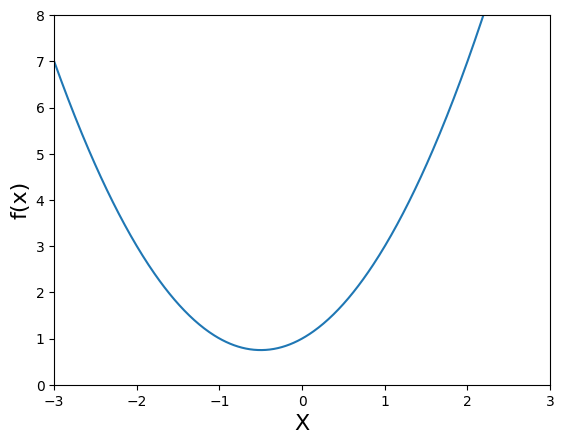

In [52]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [94]:
def df(x):
    return 2 * x + 1

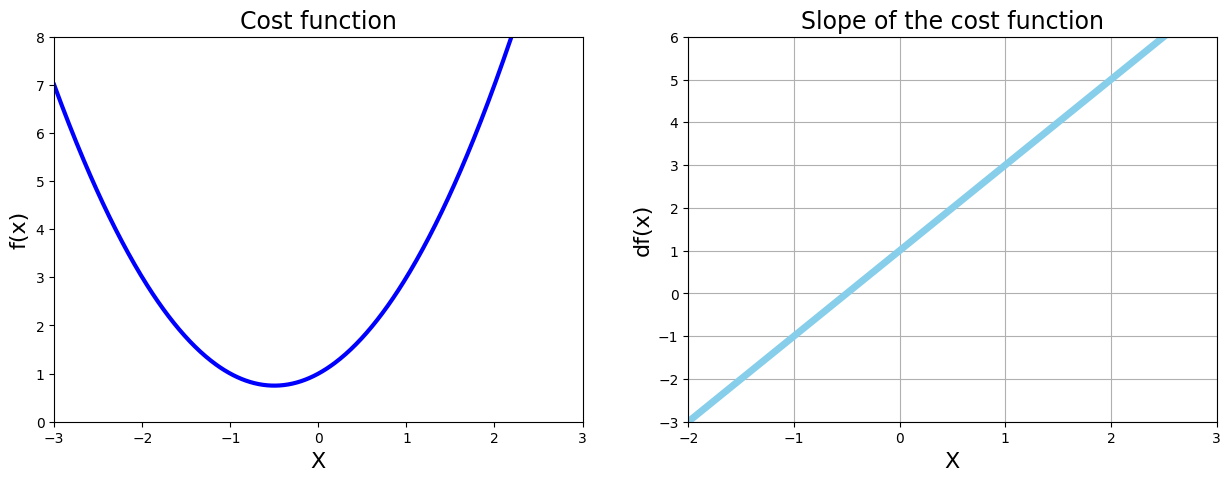

In [54]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent

In [55]:
##########################
##########################

## TASK-1 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient

    step_size = abs(new_x - previous_x)
    # print(step_size)

    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


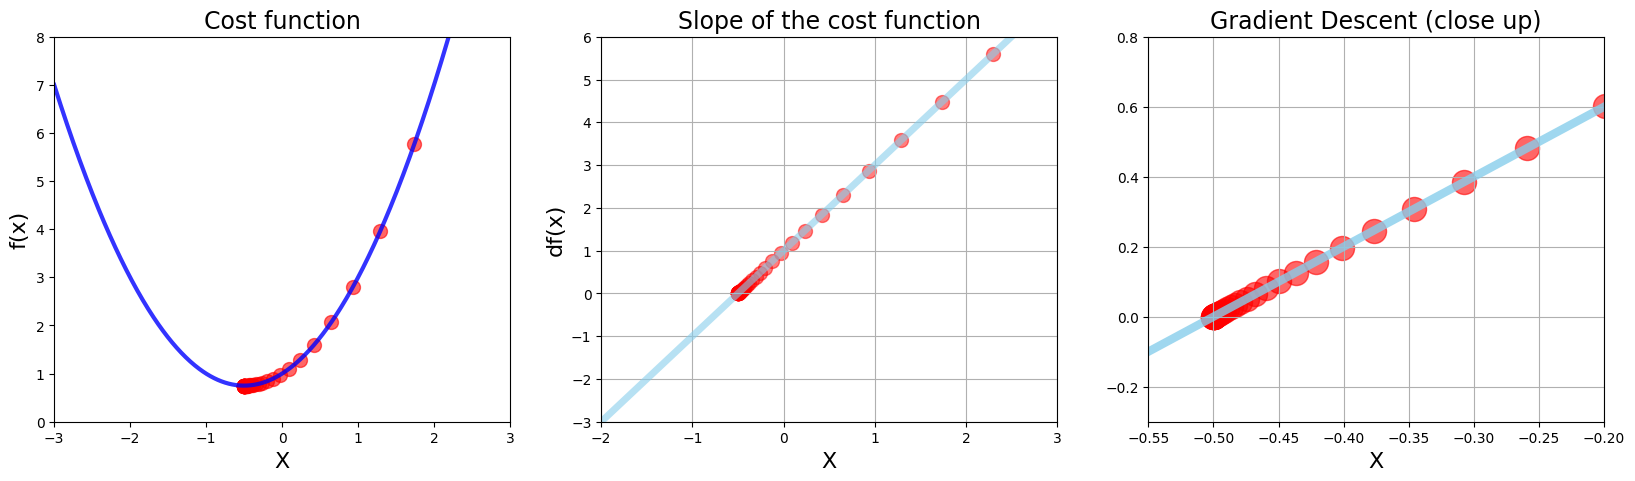

In [56]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [57]:
##########################
##########################

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return  x**2 - 2*x + 3

def dg(x):
    return 2*x - 2

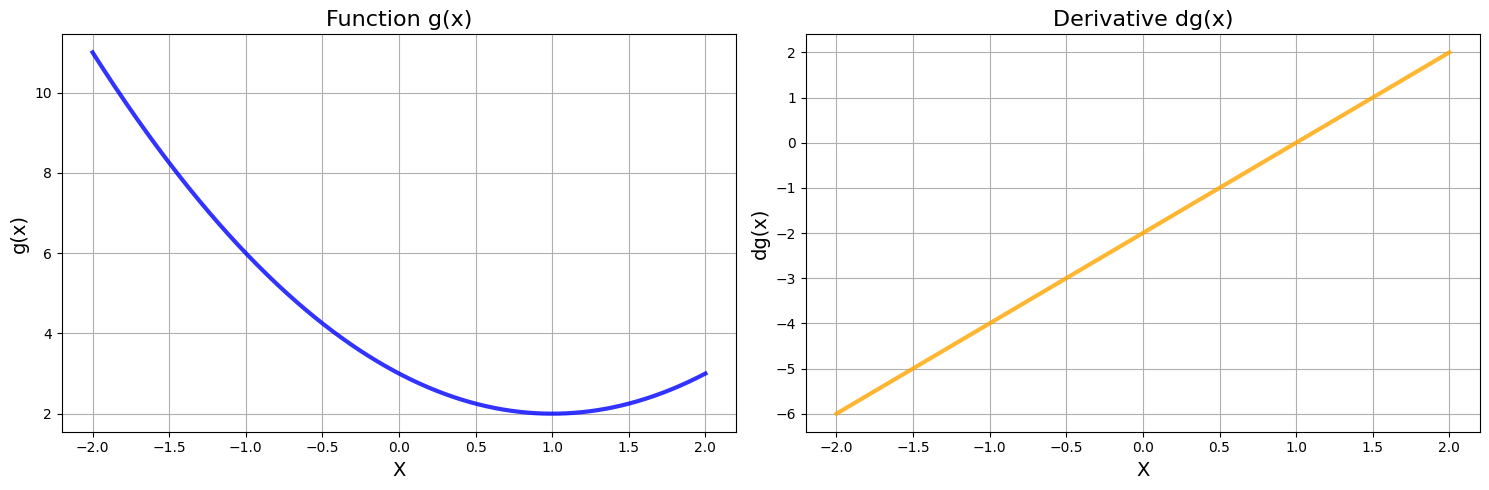

In [58]:
## TASK-3 : Plot function and derivative side by side like has been done earlier
x_2 = np.linspace(-2, 2, 1000)

plt.figure(figsize=[15, 5])

#Function g(x)
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.title('Function g(x)', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('g(x)', fontsize=14)
plt.grid(True)

#Derivative dg(x)
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), color='orange', linewidth=3, alpha=0.8)
plt.title('Derivative dg(x)', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel("dg(x)", fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()

## Gradient Descent

In [59]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [60]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 0.9765947932240794
Number of steps: 76


In [61]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 0.9951661100851998
Number of steps: 285


In [62]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 0.9762923454240657
Number of steps: 95


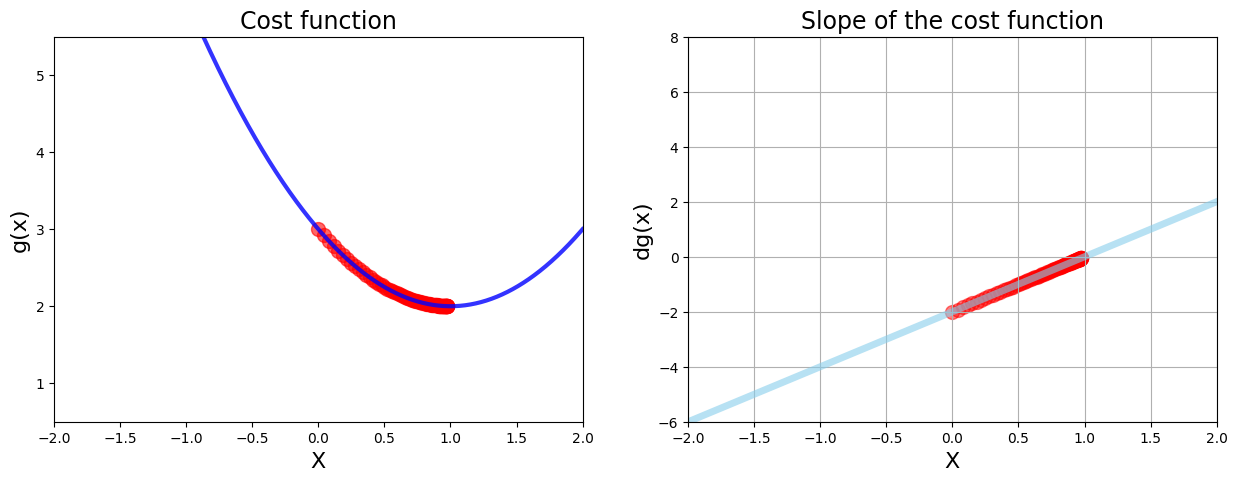

In [63]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence and Overflow

## $$h(x) = x^5 - 2x^4 + 2$$

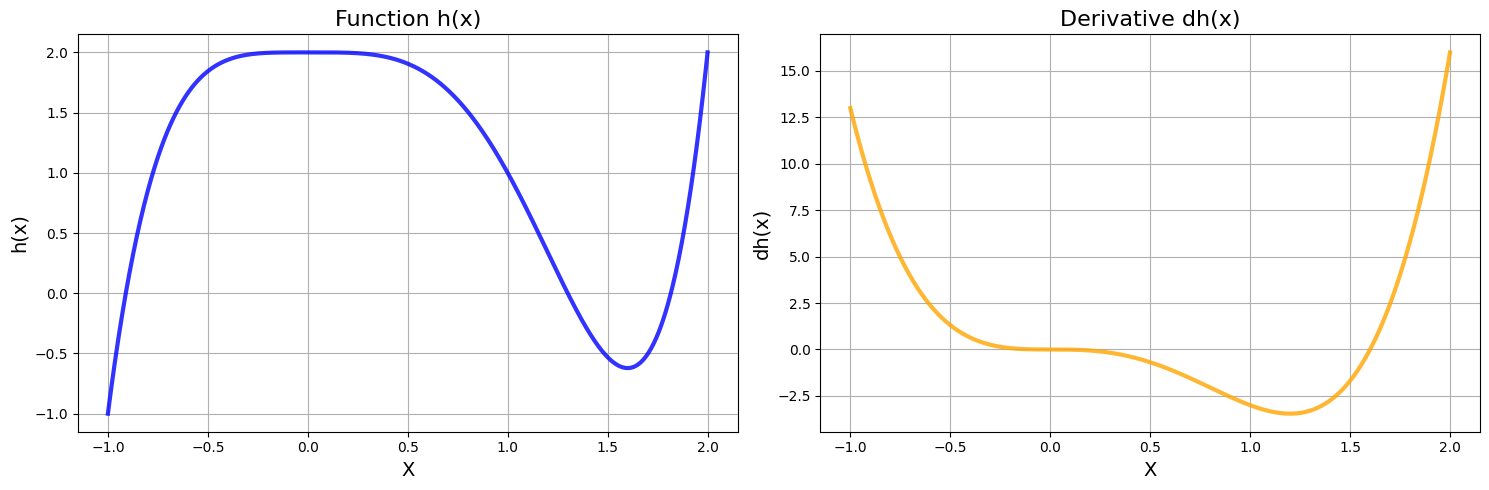

Local min occurs at: 1.5952260152397162
Number of steps: 655


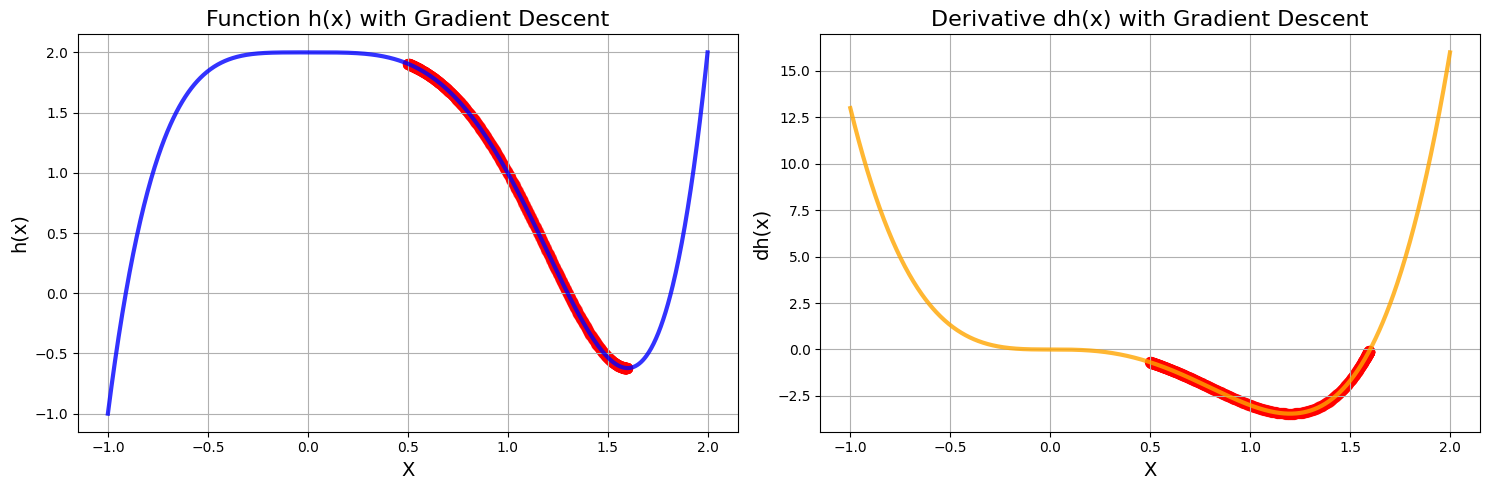

In [64]:
def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3
x_3 = np.linspace(-1, 2, 1000)
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.title('Function h(x)', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('h(x)', fontsize=14)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(x_3, dh(x_3), color='orange', linewidth=3, alpha=0.8)
plt.title('Derivative dh(x)', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('dh(x)', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()

def gradient_descent(derivative_func, initial_guess, multiplier=0.001, precision=0.0001, max_iter=1000):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

initial_guess = 0.5
local_min_h, list_x_h, deriv_list_h = gradient_descent(dh, initial_guess)

print('Local min occurs at:', local_min_h)
print('Number of steps:', len(list_x_h))
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x_h, h(np.array(list_x_h)), color='red', s=50, alpha=0.6)
plt.title('Function h(x) with Gradient Descent', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('h(x)', fontsize=14)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(x_3, dh(x_3), color='orange', linewidth=3, alpha=0.8)
plt.scatter(list_x_h, deriv_list_h, color='red', s=50, alpha=0.6)
plt.title('Derivative dh(x) with Gradient Descent', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('dh(x)', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()





# The Learning Rate

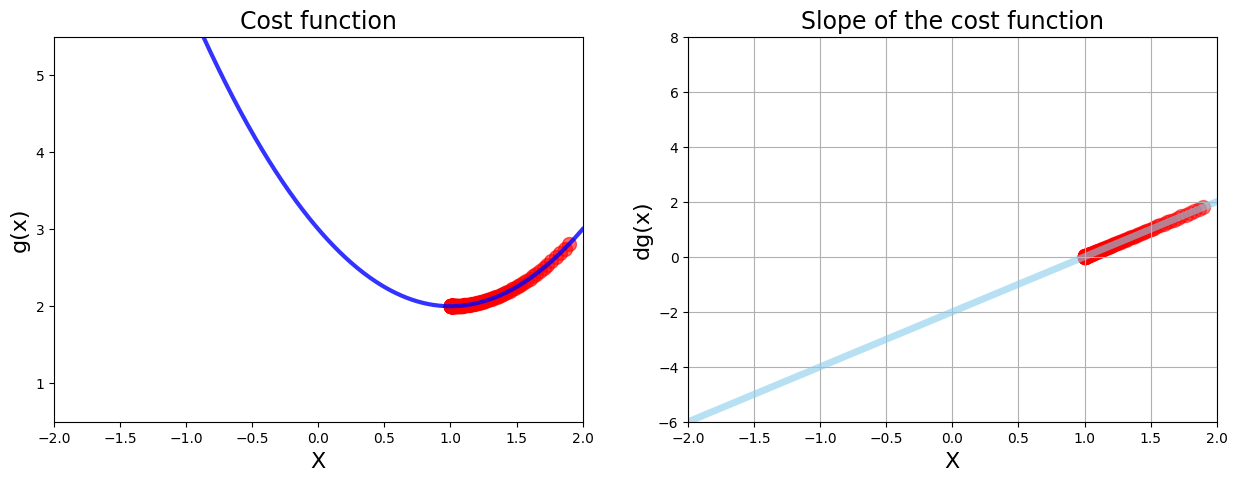

Number of steps is:  147


In [65]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

In [66]:
## TASK-5 : Run gradient descent 3 times
## TASK-6 : Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002)
n = 100  # maximum number of iterations

# Low learning rate
low_gamma = gradient_descent(
    derivative_func=dg,
    initial_guess=3,
    multiplier=0.0005,
    precision=0.0001,
    max_iter=n
)

# Mid learning rate
mid_gamma = gradient_descent(
    derivative_func=dg,
    initial_guess=3,
    multiplier=0.001,
    precision=0.0001,
    max_iter=n
)

# High learning rate
high_gamma = gradient_descent(
    derivative_func=dg,
    initial_guess=3,
    multiplier=0.002,
    precision=0.0001,
    max_iter=n
)

# Insane learning rate
insane_gamma = gradient_descent(
    derivative_func=dg,
    initial_guess=1.9,
    multiplier=0.25,
    precision=0.0001,
    max_iter=n
)


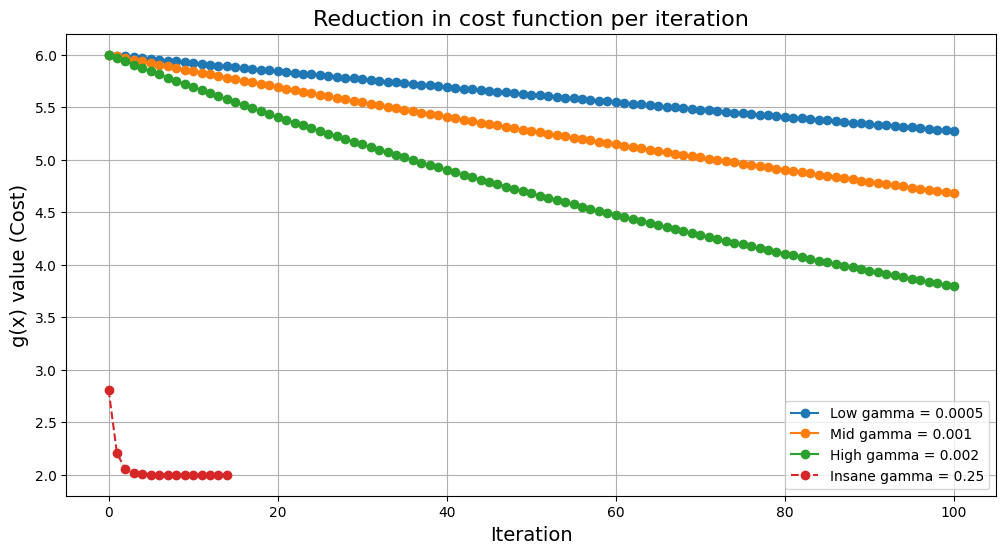

In [67]:
## TASK-7 : Plot reduction in cost for each iteration
import matplotlib.pyplot as plt
import numpy as np

# Extract x values from gradient descent results
x_low = np.array(low_gamma[1])
x_mid = np.array(mid_gamma[1])
x_high = np.array(high_gamma[1])
x_insane = np.array(insane_gamma[1])

# Compute corresponding cost values f(x) or g(x)
y_low = g(x_low)
y_mid = g(x_mid)
y_high = g(x_high)
y_insane = g(x_insane)

# Plot cost reduction per iteration
plt.figure(figsize=[12,6])

plt.plot(range(len(y_low)), y_low, label='Low gamma = 0.0005', marker='o')
plt.plot(range(len(y_mid)), y_mid, label='Mid gamma = 0.001', marker='o')
plt.plot(range(len(y_high)), y_high, label='High gamma = 0.002', marker='o')
plt.plot(range(len(y_insane)), y_insane, label='Insane gamma = 0.25', marker='o', linestyle='--')

plt.title('Reduction in cost function per iteration', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('g(x) value (Cost)', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

Minimum of f1(x,y) at: [7.79207312e+39 7.79207312e+39]
Minimum of f2(x,y) at: [0.27724348 0.27724348]


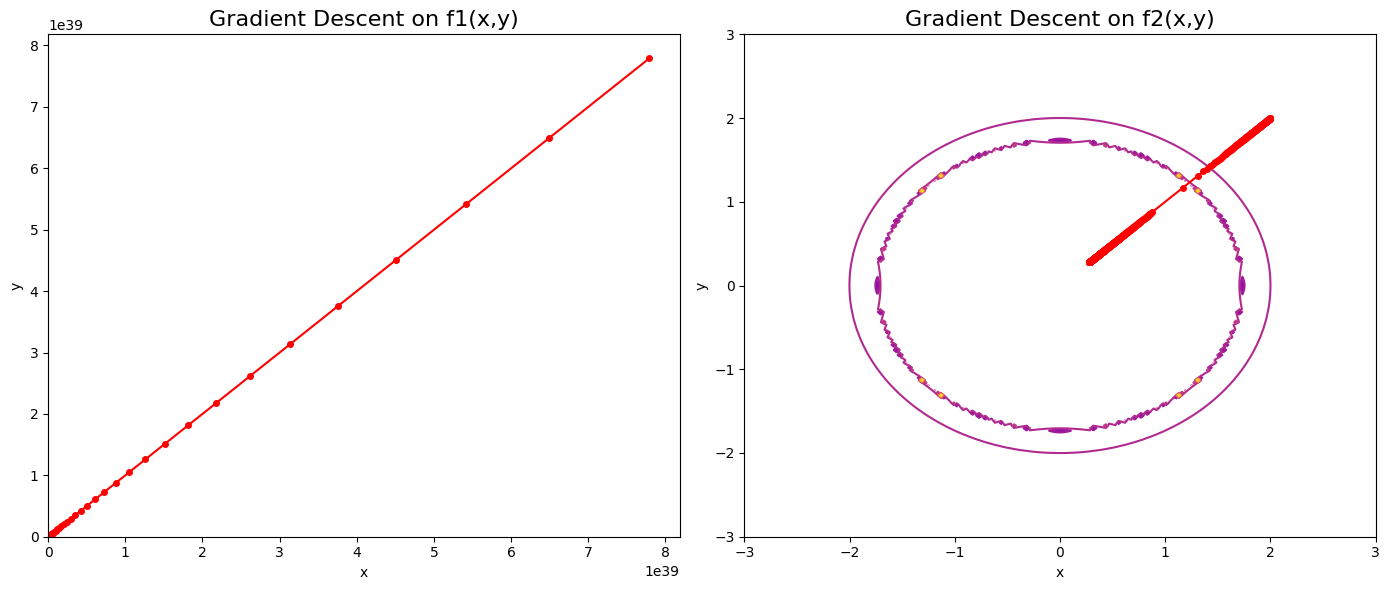

In [68]:
## TASK-8 : Code the same things as they were done for the first two examples
import numpy as np
import matplotlib.pyplot as plt

def f1(x, y):
    return 14 - x**2 - y**2

def grad_f1(x, y):
    return np.array([-2*x, -2*y])

def f2(x, y):
    r = 3 - x**2 - y**2
    return 1/r + 1

def grad_f2(x, y):
    r = 3 - x**2 - y**2
    return np.array([2*x/(r**2), 2*y/(r**2)])

def gradient_descent_2d(grad_func, initial_point, multiplier=0.1, precision=1e-4, max_iter=500):
    x, y = initial_point
    points = [np.array([x, y])]
    for n in range(max_iter):
        grad = grad_func(x, y)
        new_point = np.array([x, y]) - multiplier * grad
        step_size = np.linalg.norm(new_point - np.array([x, y]))
        points.append(new_point)
        x, y = new_point
        if step_size < precision:
            break
    return np.array([x, y]), points

initial_point = np.array([2.0, 2.0])
min1, points1 = gradient_descent_2d(grad_f1, initial_point, multiplier=0.1)
min2, points2 = gradient_descent_2d(grad_f2, initial_point, multiplier=0.01)

print("Minimum of f1(x,y) at:", min1)
print("Minimum of f2(x,y) at:", min2)

points1 = np.array(points1)
points2 = np.array(points2)

x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=[14,6])

plt.subplot(1,2,1)
Z1 = f1(X, Y)
plt.contour(X, Y, Z1, levels=20, cmap='viridis')
plt.plot(points1[:,0], points1[:,1], 'ro-', markersize=4)
plt.title('Gradient Descent on f1(x,y)', fontsize=16)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1,2,2)
Z2 = f2(X, Y)
plt.contour(X, Y, Z2, levels=20, cmap='plasma')
plt.plot(points2[:,0], points2[:,1], 'ro-', markersize=4)
plt.title('Gradient Descent on f2(x,y)', fontsize=16)
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()


In [69]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


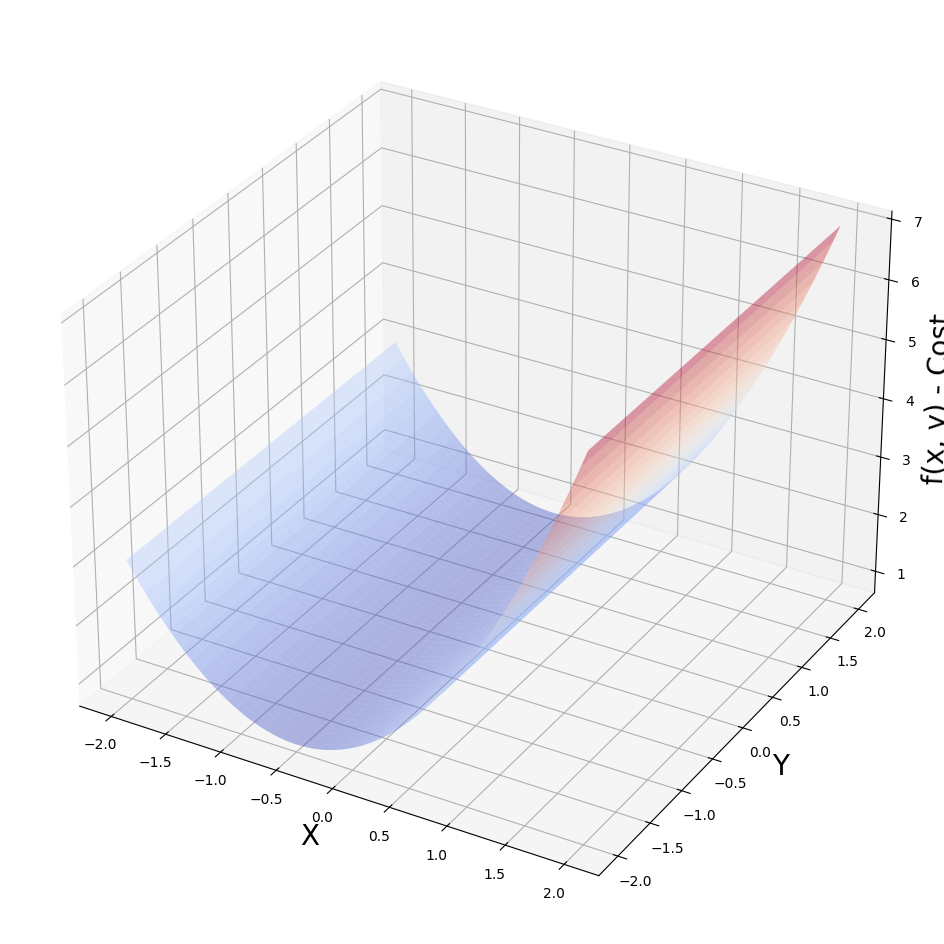

In [70]:
# Generating 3D Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

In [71]:

########################## TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.

########################## Partial Derivatives & Symbolic Computation
##########################$$\frac{\partial f}{\partial x} = ## [REQUIRED]
########################## $$\frac{\partial f}{\partial y} = ## [REQUIRED]

In [72]:
from sympy import symbols, diff

x, y = symbols('x y')
f_sym = 14 - x**2 - y**2  # or 1/(3 - x**2 - y**2) + 1 for your second function
print('Our cost function f(x, y) is: ', f_sym)
print('Partial derivative wrt x is: ', diff(f_sym, x))
print('Value of f(x, y) at x=1.8, y=1.0 is: ', f_sym.evalf(subs={x:1.8, y:1.0}))
print('Value of partial derivative wrt x at x=1.8, y=1.0: ', diff(f_sym, x).evalf(subs={x:1.8, y:1.0}))



Our cost function f(x, y) is:  -x**2 - y**2 + 14
Partial derivative wrt x is:  -2*x
Value of f(x, y) at x=1.8, y=1.0 is:  9.76000000000000
Value of partial derivative wrt x at x=1.8, y=1.0:  -3.60000000000000


## Batch Gradient Descent with SymPy

In [73]:
a, b = symbols('x y')
f_sym = 14 - a**2 - b**2

multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0], dtype=float)

for n in range(max_iter):
    gradient_x = float(diff(f_sym, a).evalf(subs={a: params[0], b: params[1]}))
    gradient_y = float(diff(f_sym, b).evalf(subs={a: params[0], b: params[1]}))
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', float(f_sym.evalf(subs={a: params[0], b: params[1]})))

Values in gradient array [-1.16881097e+40 -6.49339427e+39]
Minimum occurs at x value of:  7.012865811434208e+39
Minimum occurs at y value of:  3.896036561907893e+39
The cost is:  -6.435938778090586e+79


In [74]:
##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Partial derivative functions example 4
def fpx(x, y):
    return 2*x / (3 - x**2 - y**2)**2

def fpy(x, y):
    return 2*y / (3 - x**2 - y**2)**2

In [75]:
def f(x, y):
    return 14 - x**2 - y**2

def fpx(x, y):
    return -2*x

def fpy(x, y):
    return -2*y
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0], dtype=float)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


Values in gradient array [-1.16881097e+40 -6.49339427e+39]
Minimum occurs at x value of:  7.012865811434208e+39
Minimum occurs at y value of:  3.896036561907893e+39
The cost is:  -6.435938778090586e+79


## Graphing 3D Gradient Descent

In [76]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [-2.05764507e+16 -1.14313615e+16]
Minimum occurs at x value of:  1.2345870427072304e+16
Minimum occurs at y value of:  6858816903929058.0
The cost is:  -1.9946388592368145e+32


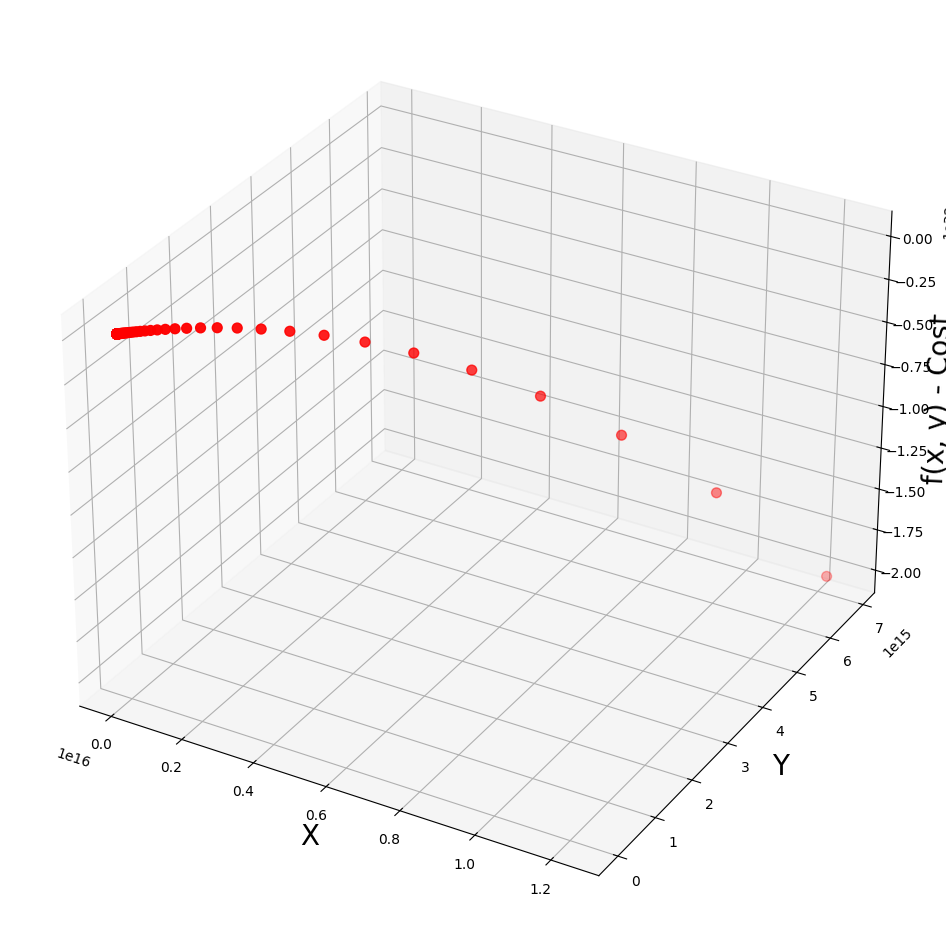

In [77]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

## For Reference, practice and play with the code below

# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [78]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [79]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


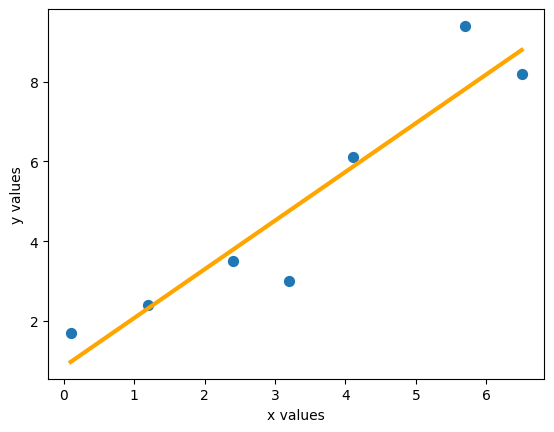

In [80]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [81]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [82]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [83]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))


Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.947965575979458
MSE regression is 0.9479655759794577


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [84]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


### Calc MSE using nested for loops

In [85]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

/tmp/ipython-input-23729001.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plot_cost[i][j] = mse(y_5, y_hat)


Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


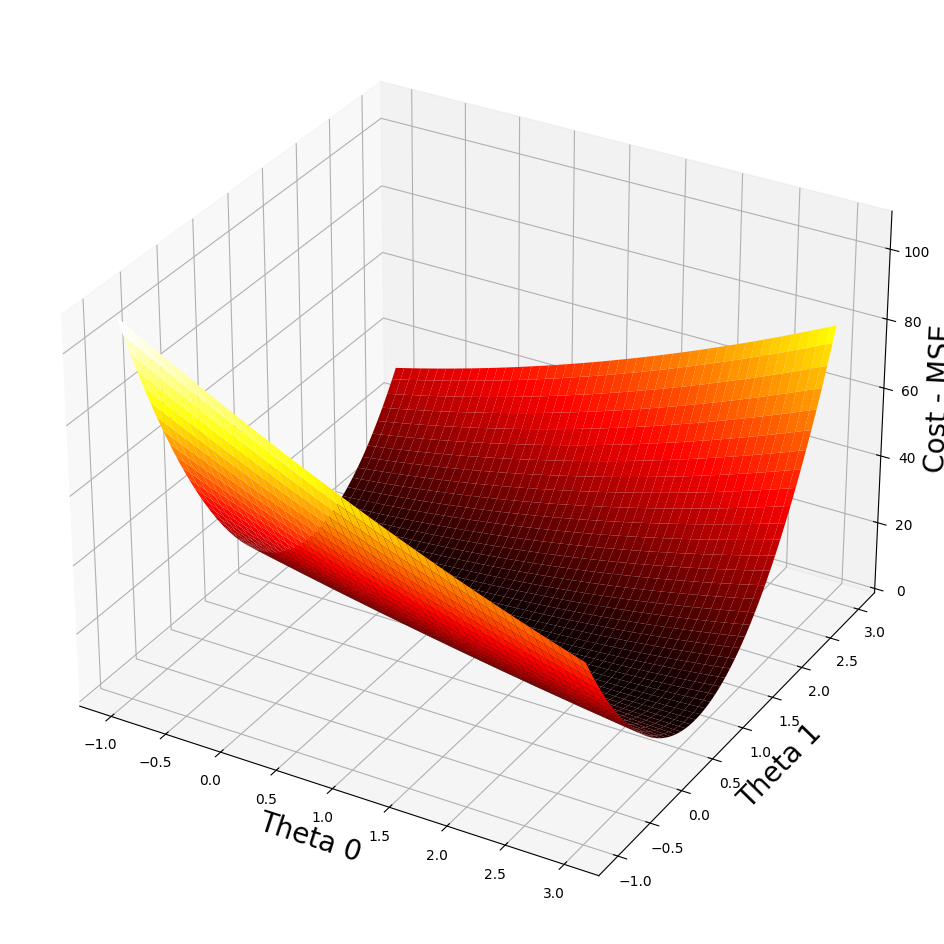

In [86]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [87]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[ij_min[0]][ij_min[1]])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[ij_min[0]][ij_min[1]])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (np.int64(111), np.int64(91))
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [88]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [89]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


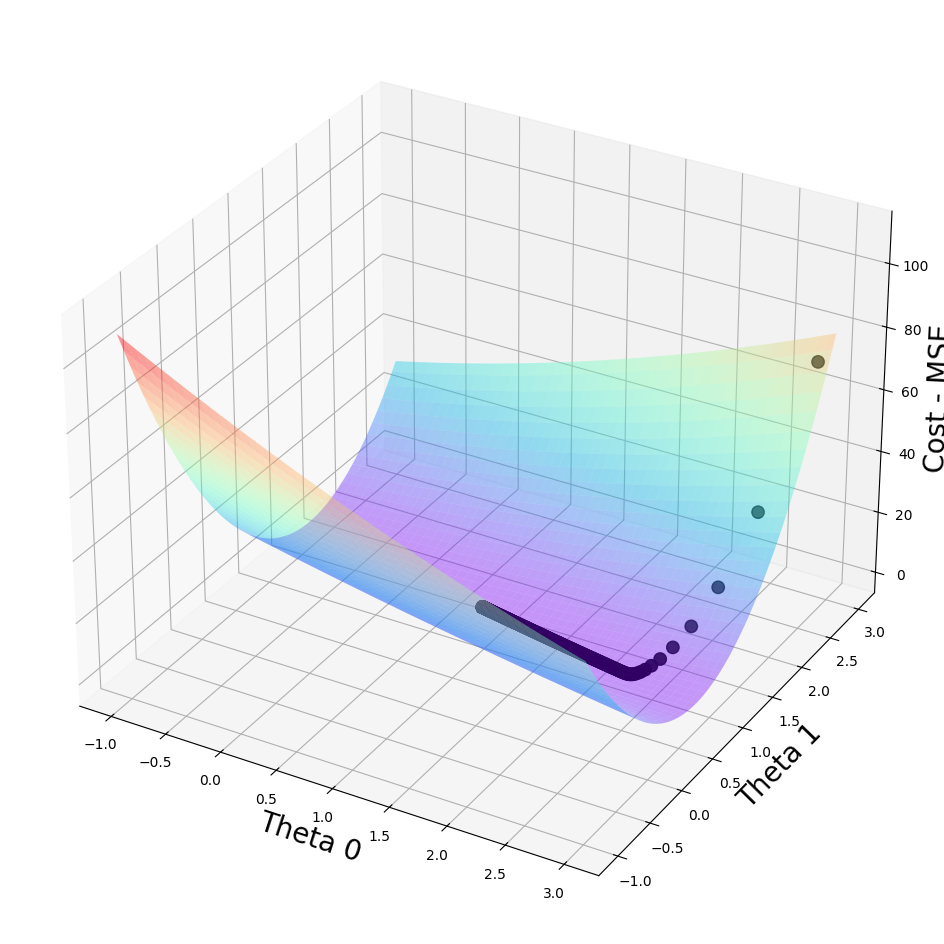

In [90]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()